# <u><center><font color=red>GRIP - The Sparks Foundation</font></center></u>

### <center>Internship on</center>


## <u><center><font color=darkblue>Data Science and Business Analytics</font></center></u>

### <center><font color='darkblue'> </font> Nikhil Agarwal</center>
 <br>

# # Simple Linear Regression 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing all libraries required

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Reading data from remote link
data = pd.read_csv("Downloads/student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# The shape of dataset 
data.shape

(25, 2)

In [5]:
# check the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# check the description of student_score data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Now let's plot a graph of our data so that it will give us clear idea about data

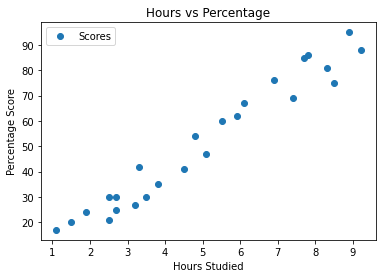

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

  **we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Linear Regression Model
Now we prepare the data and split it in test data.

In [22]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=18)

## Training the model

In [23]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

## Training the Algorithm
**Now the spliting of our data into training and testing sets is done, now it's time to train our algorithm.**

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


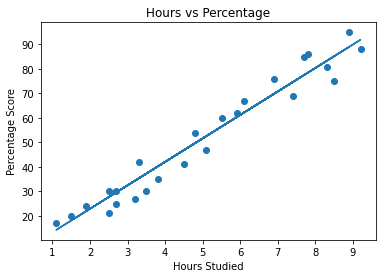

In [25]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### Checking the accuracy scores for training and test set

In [26]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9771327540131409
Training Score
0.9394119990507684


In [27]:
y_test

array([21, 30, 88, 25, 95], dtype=int64)

In [28]:
y_predict

array([85.21162853, 49.72140851, 60.272555  , 56.43577446, 35.33348148,
       37.25187175, 46.84382311, 78.49726258, 29.57831066, 40.12945716,
       52.59899392, 69.86450636, 83.29323826, 34.37428634, 62.19094528,
       14.23118849, 21.90474958, 18.06796904, 74.66048204, 77.53806745])

In [29]:
y_predict[:5]

array([85.21162853, 49.72140851, 60.272555  , 56.43577446, 35.33348148])

In [30]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data

,Actual,Predicted
0,21,85.211629
1,30,49.721409
2,88,60.272555
3,25,56.435774
4,95,35.333481


In [31]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.40559205]


### Model Evaluation Metrics

In [32]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 1965.8359493923047
Mean absolute Error: 40.552555004761786
